In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# NumPy, Pandas, and Matplotlib

Here we outlines techniques for effectively loading, storing, and manipulating in-memory data in Python. Machine learning datasets can come from a wide range of sources and a wide range of formats, including documents, images, sound recording, scientific measurements, or nearly anything else. Despite this apparent heterogeneity, it will help us to think of all data fundamentally as arrays of numbers.

For example, images can be thought of as simply two-dimensional arrays of numbers representing pixel brightness across the area. Sound clips can be thought of as one-dimensional arrays of intensity versus time. Text can be converted in various ways into numerical representations. No matter what the data are, the first step in making it analyzable will be to transform them into arrays of numbers.

For this reason, efficient storage and manipulation of numerical arrays is  fundamental to the process of doing machine learning. We'll now take a look at the specialized tools that Python has for handling and visualizing such numerical arrays: the NumPy package, the Pandas package, and the Matplotlib package.

## 1. NumPy

NumPy (short for Numerical Python) provides an efficient interface to store and operate on dense data buffers. In some ways, NumPy arrays are like Python's built-in `lis`t type, but NumPy arrays provide much more efficient storage and data operations as the arrays grow larger in size. NumPy arrays form the core of nearly the entire ecosystem of machine learning tools in Python, so time spent learning to use NumPy effectively will be valuable.

In [ ]:
# we import the numpy module and set an alias for numpy as "np"
import numpy as np

In [ ]:
#Documentation: numpy.org

# uncomment to view the "namespace" or list of all possible functions and attributes
#dir(np)

# uncomment to view built-in documentation
# help(np)

### Creating arrays from python lists

A python list can be converted to a numpy array by passing the list into the `np.array()` function. Unlike python lists, a numpy array must have a uniform data type. When passing in a python list containing multiple data types, each element of the list is cast to the most "permissive" data type.

In [ ]:
# creating an array from a list
a = np.array([1, 4, 2, 5, 3])
print(a)

[1 4 2 5 3]


In [ ]:
# creating an array from a list of mixed data types
a = np.array([3.14, 4, 2, 3])
print(a.dtype, a)

float64 [3.14 4.   2.   3.  ]


In [ ]:
# explicitly setting the data type or dtype
# float32 is a 32-bit floating point value
a = np.array([1, 2, 3, 4], dtype='float32')
print(a)

[1. 2. 3. 4.]


In [ ]:
# creating an 2-D array from a nested list
a = np.array([[1, 2, 3],
              [4, 5, 6],
              [7, 8, 9]])
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [ ]:
# creating the same 2-D array as above but with a list comprehension
a = np.array([range(i, i+3) for i in [1, 4, 7]])
print(a)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


### Creating arrays from scratch

In [ ]:
# a 1-D array of 5 zeros with integer data type
a = np.zeros(5, dtype=int)
print(a)

[0 0 0 0 0]


In [ ]:
# a 2-D array of 3x5 (3 rows, 5 columns) ones with float data type
a = np.ones((3, 5), dtype=float)
print(a)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


In [ ]:
# a 2-D array of 2x2 (2 rows, 2 columns) values
a = np.full((2, 2), 3.14)
print(a)

[[3.14 3.14]
 [3.14 3.14]]


In [ ]:
# an ordered set of integers from 0 (inclusive) to 10 (exclusive) counting by 2's
a = np.arange(0, 10, 2) # note the similarity to built-in python `range()`
print(a)

[0 2 4 6 8]


In [ ]:
# a continuous ordered set from 0 (inclusive) to 1 (inclusive) broken into 5 equally-spaced data points
a = np.linspace(0, 1, 5) # note the syntax differences compared to `np.arange()`
print(a)

[0.   0.25 0.5  0.75 1.  ]


In [ ]:
# a 2-D array of 2x2 numbers sampled from the uniform distribution [0, 1) (0 inclusive, 1 exclusive)
a = np.random.random((2, 2))
print(a)

[[0.50223476 0.40343379]
 [0.82544006 0.3290519 ]]


In [ ]:
# a 2-D array of 2x2 numbers sampled from the normal distribution with 0 mean and unit standard deviation N(0, 1)
a = np.random.normal(0, 1, (2, 2))
print(a)

[[-0.13407662  1.03296149]
 [ 0.12869983 -1.32261315]]


In [ ]:
# a 2-D array of 2x2 numbers sample from a uniform distribution of integers from 0 (inclusive) to 10 (exclusive)
a = np.random.randint(0, 10, (2, 2))
print(a)

[[9 7]
 [6 9]]


In [ ]:
# a square, 2x2 identity matrix
a = np.eye(2)
print(a)

[[1. 0.]
 [0. 1.]]


### Array attributes

Every array has descriptive attributes for computing dimensionality and data types.

In [ ]:
x = np.random.randint(0, 10, (3,4,5))

In [ ]:
# np.ndarray.ndim gives the number of dimension of the array (i.e. 0 for scalar, 1 for vector, 2 for matrix, ..)
print(x.ndim)

3


In [ ]:
# np.ndarray.size gives the number elements on the array
print(x.size)

60


In [ ]:
# np.ndarray.size gives the size of each individual dimension
print(x.shape)

(3, 4, 5)


In [ ]:
# np.ndarray.dtype gives the datatype of the array
print(x.dtype)

int64


In [ ]:
# np.ndarray.nbytes gives the size of the array in bytes
print(x.nbytes)

480


### Indexing and slicing

Indexing ndarrays works similar to indexing Python list objects. In a one-dimensional array, the i-th value (counting from zero) can be accessed by specifying the desired index in square brackets. In a multi-dimensional array, items can be accessed using a comma-separated tuple of indices. We can use indexing operations to modify existing values in an array.

In [ ]:
# a one-dimensional array
x1 = np.array([5, 0, 3, 3, 7, 9])

In [ ]:
# indexing from zero
print(x1[0], x1[4])

5 7


In [ ]:
# indexing from the back
print(x1[-1], x1[-2])

9 7


In [ ]:
# a two-dimensional array
x2 = np.array([[1, 2, 3],
               [4, 5, 6],
               [7, 8, 9]])

In [ ]:
# print element in row=0, column=0 and row=2 column=0
print(x2[0, 0], x2[2, 0])

1 7


In [ ]:
# print element in row=2, column=-1 and row=-1, column=-1
print(x2[2, -1], x2[-1, -1])

9 9


In [ ]:
# assign a value
x1[0] = 3.14159

# watch out! values set by re-assignment are
# automatically casted to the data type of the original array
print(x1)

[3 0 3 3 7 9]


In [ ]:
x1[0:x1.shape[0]:1]

array([3, 0, 3, 3, 7, 9])

We can use Python slice notation to slice along individual dimensions of a ndarray.

```python
x[start:stop:step]
```

If any of these values are unspecified, the default values are `start=0`, `stop=end`, `step=1`.

In [ ]:
x = np.arange(10)
print(x)

[0 1 2 3 4 5 6 7 8 9]


In [ ]:
print(x[:5]) # the first five elements
print(x[5:]) # elements after index 5
print(x[4:7]) # elements after index 4 up to 7
print(x[::2]) # every other element
print(x[1::2]) # every other element starting at index 1
print(x[::-1]) # reversed array
print(x[5::-2]) # revered, every other element starting at index 5

[0 1 2 3 4]
[5 6 7 8 9]
[4 5 6]
[0 2 4 6 8]
[1 3 5 7 9]
[9 8 7 6 5 4 3 2 1 0]
[5 3 1]


In [ ]:
x2 = np.random.randint(0, 10, size=(3, 4))
print(x2)

[[2 6 8 2]
 [1 2 5 6]
 [3 7 3 3]]


In [ ]:
print(x2[:2, :3]) # two rows, three columns
print(x2[:3, ::2]) # three rows, every other column
print(x2[::-1, ::-1]) # reversed
print(x2[:, 0]) # first column of x2
print(x2[0, :]) # first row of x2
print(x2[0]) # first row of x2, shorthand

[[8 7 2]
 [5 4 6]]
[[8 2]
 [5 6]
 [9 2]]
[[8 2 5 9]
 [8 6 4 5]
 [2 2 7 8]]
[8 5 9]
[8 7 2 2]
[8 7 2 2]


It's important to note that sliced subarrays are simply references to particular values in the parent array. This means that modifying the value of a subarray will change the corresponding value in the parent array. We can make a `copy()` of the subarray to prevent modifying the parent array.

In [ ]:
x2_sub = x2[:2, :2]
print(x2_sub)

In [ ]:
x2_sub[0, 0] = 99
print(x2_sub)

In [ ]:
# The 0,0 element of x2 is also modified
print(x2)

In [ ]:
x2_sub_copy = x2[:2, :2].copy()
print(x2_sub_copy)

In [ ]:
x2_sub_copy[0, 0] = 42
print(x2_sub_copy)

In [ ]:
# The 0,0 element of x2 remains unmodified
print(x2)

### Reshaping

Another useful operation is the reshaping of arrays. Note that the size of the initial array must match the size of the reshaped array. The `reshape()` method returns a view (not a copy!) of the original data. We can create a new dimension using the `np.newaxis` keyword in a slicing operation.

In [ ]:
# a 1-D array
x = np.array([1, 2, 3])

In [ ]:
# a row vector via reshape
print(x.reshape((1, 3)))

In [ ]:
# we can also infer the size of a single dimension
# using a "-1" in the slicing operation
print(x.reshape((1, -1)))

In [ ]:
# a row vector via newaxis
print(x[np.newaxis, :])

In [ ]:
# a column vector via reshape
print(x.reshape((3, 1)))

In [ ]:
# a column vector via newaxis
print(x[:, np.newaxis])

### Concatenating and splitting

It is possible to combine multiple arrays into one, or to split a single arrays into multiple arrays. We can use `np.concatenate` to combine a list of arrays along an existing dimension. We can use `np.stack` to combine a list of arrays along a new dimension that we create. We can split an array using the `np.split` function.

In [ ]:
x = np.array([1, 2, 3])
y = np.array([4, 5, 6])
z = np.array([7, 8, 9])

In [ ]:
# concatenate along the 0-th dimension
print(np.concatenate([x, y, z], axis=0))

In [ ]:
# stack along the 0-th dimension (vectors are stacked row-wise)
print(np.stack([x, y, z], axis=0))

In [ ]:
# stack along the 1-st dimension (vectors are stacked column-wise)
print(np.stack([x, y, z], axis=1))

In [ ]:
z = np.array([1, 2, 3, 99, 99, 3, 2, 1])
# split the array at particular indices given in list
z1, z2, z3 = np.split(z, [3, 5])
print(z1, z2, z3)

### Universal functions

Universal functions rapidly operate on array values. Base Python is a dynamic, interpreted language, and the fact that variable types are flexible (sometimes a good thing!) prevents the compilation of efficient machine code for sequences of operations. This can be seen where many small operations are repeated, like looping over a list and operating on individual elements.

In [ ]:
big_list = [1 for _ in range(1000000)] # one million ones
big_array = np.array(big_list)

In [ ]:
%timeit sum(big_list)

In [ ]:
%timeit np.sum(big_array)

NumPy contains compiled routines of common array operations, known as vectorized operations. These operation, when applied to an array, apply the same operation to each element of an array. These operations call compiled C code that exist under-the-hood of NumPy and gives much faster execution.

You can find a list of [NumPy Universal Functions](https://numpy.org/doc/stable/reference/ufuncs.html) and [SciPy Universal Functions](https://docs.scipy.org/doc/scipy/reference/special.html) online.

In [ ]:
# Basic arithmetic
x = np.arange(4)
print("x     =", x)
print("x + 5 =", x + 5)
print("x - 5 =", x - 5)
print("x * 2 =", x * 2)
print("x / 2 =", x / 2)
print("x // 2 =", x // 2)  # floor division
print("-x     = ", -x)
print("x ** 2 = ", x ** 2)
print("x % 2  = ", x % 2)

In [ ]:
# Trig
theta = np.linspace(0, np.pi, 3)
print("theta      = ", theta)
print("sin(theta) = ", np.sin(theta))
print("cos(theta) = ", np.cos(theta))
print("tan(theta) = ", np.tan(theta))
x = [-1, 0, 1]
print("x         = ", x)
print("arcsin(x) = ", np.arcsin(x))
print("arccos(x) = ", np.arccos(x))
print("arctan(x) = ", np.arctan(x))

In [ ]:
# Exponentials and logarithms
x = [1, 2, 3]
print("x     =", x)
print("e^x   =", np.exp(x))
print("2^x   =", np.exp2(x))
print("3^x   =", np.power(3, x))
x = [1, 2, 4, 10]
print("x        =", x)
print("ln(x)    =", np.log(x))
print("log2(x)  =", np.log2(x))
print("log10(x) =", np.log10(x))

In [ ]:
# Some special exp/log functions with increased precision for small values
x = [0, 0.001, 0.01, 0.1]
print("exp(x) - 1 =", np.expm1(x))
print("log(1 + x) =", np.log1p(x))

In [ ]:
# Aggregation
x = np.arange(10)
print("x          =", x)
print("sum(x)     =", np.sum(x))
print("prod(x)    =", np.prod(x))
print("mean(x)    =", np.mean(x))
print("std(x)     =", np.std(x))
print("var(x)     =", np.var(x))
print("min(x)     =", np.min(x))
print("max(x)     =", np.max(x))
print("argmin(x)  =", np.argmin(x))
print("argmax(x)  =", np.argmax(x))

### Comparison operators

Comparison operators work with NumPy arrays. The result of a conditional statement gives an array of boolean (`True`, `False`) values. We can use these boolean arrays create sub-arrays like slicing but based on a condition statement. We can also check whether certain values exist within arrays.

In [ ]:
x = np.array([1, 2, 3, 4, 5])

In [ ]:
# are the elements of x less than 3?
print(x<3)

In [ ]:
# are the elements of x not equal to 3?
print(x!=3)

In [ ]:
# index the elements of x where x is less than 3
x[x<3]

In [ ]:
# How many elements in x are less than 3?
print(np.sum(x<3))

In [ ]:
# Are any elements in x less than 3?
print(np.any(x<3))

In [ ]:
# Are all elements in x less than 3?
print(np.all(x<3))

### Sorting arrays

There are two typical ways to sort an array. First, we can sort in alpha-numeric order using the `np.sort()` function. Second, we can generate a set of indices that sort an array with `np.argsort()`. When the particular array is indexed by the set of indices, the resulting array is sorted in alpha-numeric order. This is useful when we have two arrays of pair values, say `x` and `y`, and we want to sort one array (`x`) and maintain the one-to-one correspondance of values in a second array (`y`).

In [ ]:
x = np.array([2, 1, 4, 3, 5])

In [ ]:
print(np.sort(x))

In [ ]:
idx = np.argsort(x)
print(idx)
print(x[idx])

### Broadcasting

We saw in the previous section how NumPy's universal functions can be used to *vectorize* operations and thereby remove slow Python loops.
Another means of vectorizing operations is to use NumPy's *broadcasting* functionality.
Broadcasting is simply a set of rules for applying binary ufuncs (e.g., addition, subtraction, multiplication, etc.) on arrays of different sizes.

Recall that for arrays of the same size, binary operations are performed on an element-by-element basis:

In [ ]:
a = np.array([0, 1, 2])
b = np.array([5, 5, 5])
a + b

Broadcasting allows these types of binary operations to be performed on arrays of different sizes–for example, we can just as easily add a scalar (think of it as a zero-dimensional array) to an array:

In [ ]:
a + 5

We can think of this as an operation that stretches or duplicates the value ``5`` into the array ``[5, 5, 5]``, and adds the results.
The advantage of NumPy's broadcasting is that this duplication of values does not actually take place, but it is a useful mental model as we think about broadcasting.

We can similarly extend this to arrays of higher dimension. Observe the result when we add a one-dimensional array to a two-dimensional array:

In [ ]:
M = np.ones((3, 3))
M

In [ ]:
M + a

Here the one-dimensional array ``a`` is stretched, or broadcast across the second dimension in order to match the shape of ``M``.

While these examples are relatively easy to understand, more complicated cases can involve broadcasting of both arrays. Consider the following example:

In [ ]:
a = np.arange(3)
b = np.arange(3)[:, np.newaxis]

print(a)
print(b)

In [ ]:
a + b

Just as before we stretched or broadcasted one value to match the shape of the other, here we've stretched *both* ``a`` and ``b`` to match a common shape, and the result is a two-dimensional array!

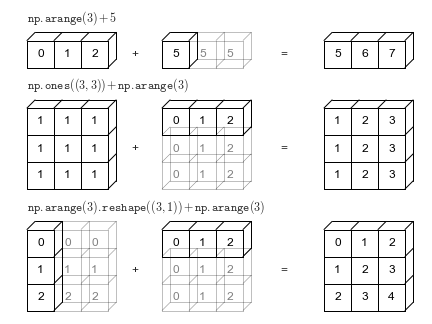

The light boxes represent the broadcasted values: again, this extra memory is not actually allocated in the course of the operation, but it can be useful conceptually to imagine that it is.

### Rules of Broadcasting

Broadcasting in NumPy follows a strict set of rules to determine the interaction between the two arrays:

- Rule 1: If the two arrays differ in their number of dimensions, the shape of the one with fewer dimensions is *padded* with ones on its leading (left) side.
- Rule 2: If the shape of the two arrays does not match in any dimension, the array with shape equal to 1 in that dimension is stretched to match the other shape.
- Rule 3: If in any dimension the sizes disagree and neither is equal to 1, an error is raised.

To make these rules clear, let's consider a few examples in detail.

#### Broadcasting example 1

Let's look at adding a two-dimensional array to a one-dimensional array:

In [ ]:
M = np.ones((2, 3))
a = np.arange(3)

Let's consider an operation on these two arrays. The shape of the arrays are

- ``M.shape = (2, 3)``
- ``a.shape = (3,)``

We see by rule 1 that the array ``a`` has fewer dimensions, so we pad it on the left with ones:

- ``M.shape -> (2, 3)``
- ``a.shape -> (1, 3)``

By rule 2, we now see that the first dimension disagrees, so we stretch this dimension to match:

- ``M.shape -> (2, 3)``
- ``a.shape -> (2, 3)``

The shapes match, and we see that the final shape will be ``(2, 3)``:

In [ ]:
M + a

#### Broadcasting example 2

Let's take a look at an example where both arrays need to be broadcast:

In [ ]:
a = np.arange(3).reshape((3, 1))
b = np.arange(3)

Again, we'll start by writing out the shape of the arrays:

- ``a.shape = (3, 1)``
- ``b.shape = (3,)``

Rule 1 says we must pad the shape of ``b`` with ones:

- ``a.shape -> (3, 1)``
- ``b.shape -> (1, 3)``

And rule 2 tells us that we upgrade each of these ones to match the corresponding size of the other array:

- ``a.shape -> (3, 3)``
- ``b.shape -> (3, 3)``

Because the result matches, these shapes are compatible. We can see this here:

In [ ]:
a + b

#### Broadcasting example 3

Now let's take a look at an example in which the two arrays are not compatible:

In [ ]:
M = np.ones((3, 2))
a = np.arange(3)

This is just a slightly different situation than in the first example: the matrix ``M`` is transposed.
How does this affect the calculation? The shape of the arrays are

- ``M.shape = (3, 2)``
- ``a.shape = (3,)``

Again, rule 1 tells us that we must pad the shape of ``a`` with ones:

- ``M.shape -> (3, 2)``
- ``a.shape -> (1, 3)``

By rule 2, the first dimension of ``a`` is stretched to match that of ``M``:

- ``M.shape -> (3, 2)``
- ``a.shape -> (3, 3)``

Now we hit rule 3–the final shapes do not match, so these two arrays are incompatible, as we can observe by attempting this operation:

In [ ]:
# uncomment below to see the error message
# M + a

Note the potential confusion here: you could imagine making ``a`` and ``M`` compatible by, say, padding ``a``'s shape with ones on the right rather than the left.
But this is not how the broadcasting rules work!
That sort of flexibility might be useful in some cases, but it would lead to potential areas of ambiguity.
If right-side padding is what you'd like, you can do this explicitly by reshaping the array (we'll use the ``np.newaxis`` keyword):

In [ ]:
a[:, np.newaxis].shape

In [ ]:
M + a[:, np.newaxis]

Also note that while we've been focusing on the ``+`` operator here, these broadcasting rules apply to *any* binary ``ufunc``.
For example, here is the ``logaddexp(a, b)`` function, which computes ``log(exp(a) + exp(b))`` with more precision than the naive approach:

In [ ]:
np.logaddexp(M, a[:, np.newaxis])

#### Example: Centering an array

In the previous section, we saw that ufuncs allow a NumPy user to remove the need to explicitly write slow Python loops. Broadcasting extends this ability.
One commonly seen example is when centering an array of data.
Imagine you have an array of 10 observations, each of which consists of 3 values.
Using the standard convention, we'll store this in a $10 \times 3$ array:

In [ ]:
X = np.random.random((10, 3))

We can compute the mean of each feature using the ``mean`` aggregate across the first dimension:

In [ ]:
Xmean = np.mean(X, axis=0)
Xmean

And now we can center the ``X`` array by subtracting the mean (this is a broadcasting operation):

In [ ]:
X_centered = X - Xmean

To double-check that we've done this correctly, we can check that the centered array has near zero mean:

In [ ]:
X_centered.mean(0)

#### Example: Plotting a two-dimensional function

One place that broadcasting is very useful is in displaying images based on two-dimensional functions.
If we want to define a function $z = f(x, y)$, broadcasting can be used to compute the function across the grid:

In [ ]:
# x and y have 50 steps from 0 to 5
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)[:, np.newaxis]

z = np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

We'll use Matplotlib to plot this two-dimensional array:

In [ ]:
plt.imshow(z, origin='lower', cmap='viridis')
plt.colorbar()

## 2. Pandas

Pandas is a powerful tool for data analysis and manipulation. We will use Pandas to load data from files. We will use Pandas to do basic data manipulation. But, ultimately, Pandas provides us a way to easily create NumPy based datasets from files.

In [ ]:
# import pandas and alias to "pd"
import pandas as pd

In [ ]:
# Documentation: pandas.pydata.org

# uncomment to view the "namespace" or list of all possible functions and attributes
# dir(pd)

# uncomment to view built-in documentation
# help(pd)

### Constructing a Series object

A pandas `Series` is an indexed, one-dimensional array with flexible indices. We can construct a `Series` object using "data" (python list, dictionary, numpy array, ..) and optionally an "index" (a set of identifier used to retreive values from the series). In the absense of an index, an ordered range object is used instead.

In [ ]:
# creating a series with a list
data = pd.Series([0.25, 0.5, 0.75, 1.0])
data

In [ ]:
print(data.values)

In [ ]:
print(data.index)

In [ ]:
print(data[1:3])

In [ ]:
# creating a series with a dictionary listing the population of 5 states
population_dict = {'California': 38332521,
                   'Texas': 26448193,
                   'New York': 19651127,
                   'Florida': 19552860,
                   'Illinois': 12882135}
population = pd.Series(population_dict)
population

In [ ]:
population

In [ ]:
print(population.values)

In [ ]:
print(population.index)

In [ ]:
print(population['California'])

In [ ]:
print(population['Texas':'Florida'])

### Constructing a Dataframe

The `DataFrame` is an analog of a two-dimensional array with flexible row indices and flexible column indices. You can also think of a `DataFrame` as a collection of `Series` objects that share a common index.

In [ ]:
# Construct a `Series` listing the area of five states
area_dict = {'California': 423967, 'Texas': 695662, 'New York': 141297,
             'Florida': 170312, 'Illinois': 149995}
area = pd.Series(area_dict)
area

In [ ]:
# Construct a `DataFrame` from a dictionary of `Series` objects
states = pd.DataFrame({'population': population,
                       'area': area})
states

In [ ]:
# Indexing a particular column, 'area'
states['area']

In [ ]:
# Constructing a DataFrame from a list of dictionaries
data = [{'a': i, 'b': 2 * i}
        for i in range(3)]
pd.DataFrame(data)

In [ ]:
# Constructing a DataFrame from a 2-D NumPy array
data = pd.DataFrame(np.random.rand(3, 2),
             columns=['foo', 'bar'],
             index=['a', 'b', 'c'])
data

In [ ]:
# Swap the row/columns of a DataFrame
data.T

In [ ]:
# Loading a DataFrame from a .csv file
pd.read_csv('sample_data/california_housing_train.csv')

In [ ]:
# Loading a DataFrame from a .json file
pd.read_json('sample_data/anscombe.json')

### Converting to NumPy

DataFrames can be converted to NumPy arrays by accessing the `pd.DataFrame.values` attribute.

In [ ]:
data.values

### Indexing

Sub-DataFrames can be constructed by indexing operations on DataFrames. There are two ways of locating data within a DataFrame: using the `pd.DataFrame.iloc` attribute or using the `pd.DataFrame.loc` attribute. The `iloc` attribute allows NumPy-like slicing by numeric indices. The `loc` attribute uses the row/column names for slicing operations. We can use indexing operations to reassign values within a DataFrame.

In [ ]:
# first two rows, first column
data.iloc[:2, :1]

In [ ]:
# same as above, but using row/column index values
data.loc[:'b', :'foo']

In [ ]:
# variable reassignment
data.iloc[0, 1] = 2.0
data

### Handling missing data

Missing data is given an assigned value of `NaN`, or "Not a Number". In Python, `NaN` values are indicated by the value `None` or in NumPy `np.nan`. `NaN` values wreck normal NumPy operations. We use specialized NumPy operations to deal with data that potentially contain missing values.

In [ ]:
v = np.array([1, np.nan, 3, 4])
v

In [ ]:
1 + np.nan

In [ ]:
print(np.sum(v), np.min(v), np.max(v))

In [ ]:
print(np.nansum(v), np.nanmin(v), np.nanmax(v))

### Operating on null values

- `pd.DataFrame.isnull()` generates Boolean mask of missing values
- `pd.DataFrame.notnull()` generates the opposite of `isnull()`
- `pd.DataFrame.dropna()` returns filtered version of data
- `pd.DataFrame.fillna()` returns a copy of the data with missing values filled

In [ ]:
data = pd.DataFrame([[1, None, 3], [4, 5, 6], [None, 8, 9]])
data

In [ ]:
data.isnull()

In [ ]:
# drop rows that contain NaN values
data.dropna()

In [ ]:
# drop columns that contain NaN values
data.dropna(axis=1)

In [ ]:
# fill NaN values with "0"
data.fillna(0)

### Combining Dataframes

DataFrame can be merged together using the `pd.concat()` operation. DataFrame can be combined by row or by column. There are additional arguments to preserve row index names or to compute new row indicies. For DataFrame with different column indices, we can combine either by union (keep all unique column names) or by intersection (keep only columns names that exist in all DataFrames combined). We can also use `pd.merge()` disjoint DataFrame with useful results.

In [ ]:
df1 = pd.DataFrame({'A': ['A1', 'A2'], 'B': ['B1', 'B2']})
df1

In [ ]:
df2 = pd.DataFrame({'A': ['A3', 'A4'], 'B': ['B3', 'B4']})
df2

In [ ]:
# concatenate df1 and df2 row-wise
pd.concat([df1, df2])

In [ ]:
# recompute the row indices
pd.concat([df1, df2], ignore_index=True)

In [ ]:
df3 = pd.DataFrame({'C': ['C1', 'C2'], 'D': ['D1', 'D2']})
df3

In [ ]:
# combine DataFrame column-wise
pd.concat([df1, df3], axis=1)

In [ ]:
data = 'ABC'
ind = range(2)
# this is dictionary-comprehension where the value is given by a list-comprehension
df5 = pd.DataFrame({i:[i+str(j) for j in ind] for i in data})
df5

In [ ]:
data = 'BCD'
ind = range(2, 5)
df6 = pd.DataFrame({i:[i+str(j) for j in ind] for i in data})
df6

In [ ]:
# union of columns (missing values are NaN)
pd.concat([df5, df6])

In [ ]:
# intersection of columns (columns with NaN values are dropped)
pd.concat([df5, df6], join='inner')

In [ ]:
employee = ['Bob', 'Jake', 'Lisa', 'Sue']
group = ['HR', 'Engr', 'Engr', 'Acct']
df1 = pd.DataFrame({'employee': employee, 'group': group})
df1

In [ ]:
employee = ['Lisa', 'Bob', 'Jake', 'Sue']
hire_date = [2004, 2008, 2012, 2014]
df2 = pd.DataFrame({'employee': employee, 'hire_date': hire_date})
df2

In [ ]:
# dataframe in second argument "df2" is sorted to match first argument "df1"
# this is an example of a one-to-one join
df3 = pd.merge(df1, df2)
df3

In [ ]:
group = ['Acct', 'Engr', 'HR']
supervisor = ['Ed', 'Carly', 'Steve']
df4 = pd.DataFrame({'group': group, 'supervisor': supervisor})
df4

In [ ]:
# This is an example of a many-to-one join
# The information in df4 is repeated as needed
df5 = pd.merge(df3, df4)
df5

## 3. Matplotlib

In [ ]:
# import the matplotlib.pyplot submodule as plt
import matplotlib.pyplot as plt

In [ ]:
# documentation: matplotlib.org

# help(plot)

In [ ]:
%matplotlib inline

### The MATLAB-style interface

`Matplotlib` was originally created as a MATLAB plotting replacement for Python users. There exists an interface that should seem familiar to previous MATLAB users.

It is important to note that this interface is stateful: it keeps track of the "current" figure and axes, which are where all `plt` commands are applied. You can get a reference to these using the `plt.gcf()` (get current figure) and `plt.gca()` (get current axes) routines. Use can use `plt.show()` to display the figure in its current state. You can use `plt.close()` to re-initialize the current figure and axes.

In [ ]:
plt.figure()  # create a plot figure

# create the first of two panels and set current axis
plt.subplot(2, 1, 1) # (rows, columns, panel number)
plt.plot(x, np.sin(x))

# create the second panel and set current axis
plt.subplot(2, 1, 2)
plt.plot(x, np.cos(x))

### The Object-oriented interface

The object-oriented interface is available for these more complicated situations, and for when you want more control over your figure. Rather than depending on some notion of an "active" figure or axes, in the object-oriented interface the plotting functions are methods of explicit `Figure` and `Axes` objects. To re-create the previous plot using this style of plotting, you might do the following:

In [ ]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x))

### Line plots

In [ ]:
# empty plot
fig = plt.figure()
ax = plt.axes()

In [ ]:
# plot a line using the object-oriented interface
fig = plt.figure()
ax = plt.axes()

x = np.linspace(0, 10, 1000)
ax.plot(x, np.sin(x))

In [ ]:
# plot a line using the MATLAB-style interface
plt.plot(x, np.sin(x))

In [ ]:
# plot two lines using the MATLAB-stype interface
plt.plot(x, np.sin(x))
plt.plot(x, np.cos(x))

In [ ]:
# Adjusting colors
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

In [ ]:
# Adjusting linestyle
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted');

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':');  # dotted

In [ ]:
# Adjusting axes limits
plt.plot(x, np.sin(x))
plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5)

In [ ]:
# Labeling axes and title
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)")

In [ ]:
# Using a legend
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')
plt.axis('equal')
plt.legend()

### Scatter plots

In [ ]:
# Creating a scatter with plt.plot()
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.plot(x, y, 'o', color='black')

In [ ]:
# Marker styles
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8)

In [ ]:
# combining line and scatter plot
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2)

In [ ]:
# Creating a scatter plot with plt.scatter
plt.scatter(x, y, marker='o')

In [ ]:
# The primary difference of plt.scatter from plt.plot is
# that it can be used to create scatter plots where the
# properties of each individual point (size, face color, edge color, etc.)
# can be individually controlled or mapped to data.
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,
            cmap='viridis')
plt.colorbar() # show color scale

In [ ]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

### Error bars

In [ ]:
# Create a scatter plot with error bars using plt.errorbar
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

plt.errorbar(x, y, yerr=dy, fmt='.k')

In [ ]:
# This shows some additional arguments for controlling the formatting of error bars
plt.errorbar(x, y, yerr=dy, fmt='o', color='black',
             ecolor='lightgray', elinewidth=3, capsize=0)

In [ ]:
# Here's an example with a continuously estimated error bar
# Don't worry about the details on the modeling just yet

from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF

# define the model and draw some data
model = lambda x: x * np.sin(x)
xdata = np.array([1, 3, 5, 6, 8])
ydata = model(xdata)

# Compute the Gaussian process fit
gp = GaussianProcessRegressor(kernel=RBF())
gp.fit(xdata[:, np.newaxis], ydata)

xfit = np.linspace(0, 10, 1000)
yfit, MSE = gp.predict(xfit[:, np.newaxis], return_std=True)
dyfit = 2 * np.sqrt(MSE)  # 2*sigma ~ 95% confidence region

In [ ]:
# Visualize the result
plt.plot(xdata, ydata, 'or')
plt.plot(xfit, yfit, '-', color='gray')

plt.fill_between(xfit, yfit - dyfit, yfit + dyfit,
                 color='gray', alpha=0.2)
plt.xlim(0, 10)

### Contour plots

In [ ]:
# A three-dimensional function z = f(x, y)
def f(x, y):
    return np.sin(x) ** 10 + np.cos(10 + y * x) * np.cos(x)

In [ ]:
x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

# Question for you: What does np.meshgrid do here?
X, Y = np.meshgrid(x, y)
Z = f(X, Y)

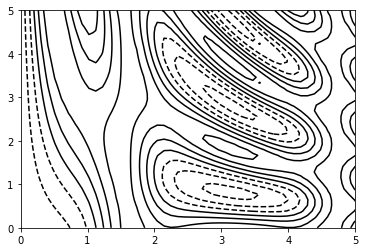

In [ ]:
# Make a contour plot
plt.contour(X, Y, Z, colors='black')

In [ ]:
# plot as "filled" contour plt.contourf
# Change the number of bins to "20"
# change the colormap, show colorbar
# see: https://matplotlib.org/stable/tutorials/colors/colormaps.html
plt.contourf(X, Y, Z, 20, cmap='RdGy')
plt.colorbar()

In [ ]:
# imshow() can display two-dimensional array data like images
# here, we specify extent since imshow() can't deal with X, Y data
plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy')
plt.colorbar()
plt.axis(aspect='image')

In [ ]:
# A nicely labeled contour plot overlayed on an imshow image
contours = plt.contour(X, Y, Z, 3, colors='black')
plt.clabel(contours, inline=True, fontsize=8)

plt.imshow(Z, extent=[0, 5, 0, 5], origin='lower',
           cmap='RdGy', alpha=0.5)
plt.colorbar()

### Histograms

(array([  3.,  16.,  48., 151., 237., 244., 190.,  81.,  24.,   6.]),
 array([-3.29298209, -2.64613924, -1.99929639, -1.35245354, -0.7056107 ,
        -0.05876785,  0.588075  ,  1.23491785,  1.88176069,  2.52860354,
         3.17544639]),
 <a list of 10 Patch objects>)

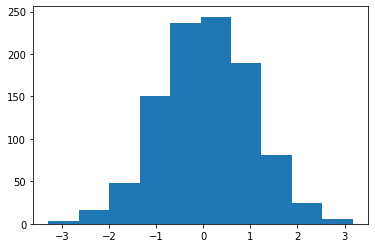

In [ ]:
# a simple histogram using samples from a normal distribution
data = np.random.randn(1000)
plt.hist(data)

(array([0.00461417, 0.01384251, 0.02768501, 0.02768501, 0.03691335,
        0.04614169, 0.11535423, 0.1937951 , 0.17995259, 0.30453516,
        0.39220437, 0.35990519, 0.39220437, 0.37374769, 0.40604688,
        0.34144851, 0.34144851, 0.23993679, 0.22609428, 0.19840927,
        0.12458256, 0.08766921, 0.08305504, 0.01845668, 0.02768501,
        0.02307085, 0.00922834, 0.00922834, 0.        , 0.00922834]),
 array([-2.9591586 , -2.74243486, -2.52571111, -2.30898736, -2.09226362,
        -1.87553987, -1.65881613, -1.44209238, -1.22536864, -1.00864489,
        -0.79192114, -0.5751974 , -0.35847365, -0.14174991,  0.07497384,
         0.29169758,  0.50842133,  0.72514508,  0.94186882,  1.15859257,
         1.37531631,  1.59204006,  1.8087638 ,  2.02548755,  2.24221129,
         2.45893504,  2.67565879,  2.89238253,  3.10910628,  3.32583002,
         3.54255377]),
 <a list of 1 Patch objects>)

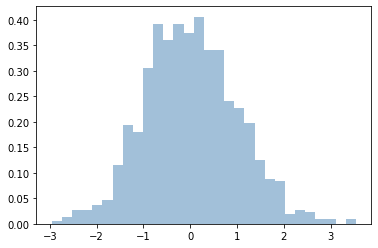

In [ ]:
# a customized histogram
plt.hist(data, bins=30, alpha=0.5, density=True,
         histtype='stepfilled', color='steelblue',
         edgecolor='none')

(array([0.00311359, 0.        , 0.01245436, 0.00934077, 0.01245436,
        0.02490872, 0.03736307, 0.02490872, 0.02802231, 0.06538538,
        0.07161256, 0.0902941 , 0.13699794, 0.20549691, 0.1494523 ,
        0.18370178, 0.17436102, 0.17747461, 0.15567948, 0.19926973,
        0.22417845, 0.16813384, 0.15567948, 0.14011153, 0.13388435,
        0.1183164 , 0.08095333, 0.08095333, 0.05293102, 0.04359025,
        0.03424949, 0.04670384, 0.0311359 , 0.01868154, 0.00311359,
        0.00622718, 0.00311359, 0.        , 0.00622718, 0.00311359]),
 array([-3.07298663, -2.75181392, -2.43064121, -2.1094685 , -1.78829579,
        -1.46712308, -1.14595037, -0.82477766, -0.50360495, -0.18243225,
         0.13874046,  0.45991317,  0.78108588,  1.10225859,  1.4234313 ,
         1.74460401,  2.06577672,  2.38694943,  2.70812214,  3.02929485,
         3.35046756,  3.67164027,  3.99281298,  4.31398569,  4.6351584 ,
         4.95633111,  5.27750382,  5.59867653,  5.91984924,  6.24102195,
         6.56219

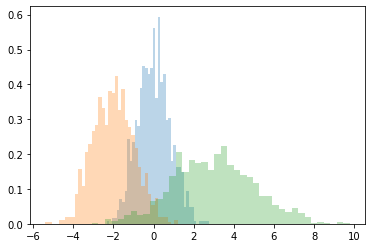

In [ ]:
# plotting multiple histograms
x1 = np.random.normal(0, 0.8, 1000)
x2 = np.random.normal(-2, 1, 1000)
x3 = np.random.normal(3, 2, 1000)

kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=40)

plt.hist(x1, **kwargs)
plt.hist(x2, **kwargs)
plt.hist(x3, **kwargs)

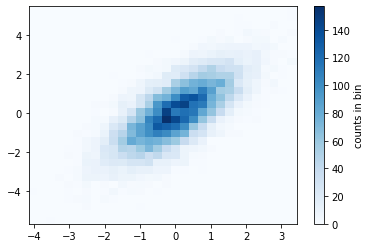

In [ ]:
# plotting a 2-D histogram
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 10000).T
plt.hist2d(x, y, bins=30, cmap='Blues')
cb = plt.colorbar()
cb.set_label('counts in bin')

### Subplots

In [ ]:
# adding a subplot one-by-one
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x))

In [ ]:
# setting up a subplot grid with plt.subplots
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')
# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')

In [ ]:
# to create subplots that span multiple rows and columns, use plt.GridSpec()
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

In [ ]:
# example of GridSpec showing a 2-d normal distribution histogram
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

### Text and annotation

Here's an example demonstrating text annotation on top of a chart showing US births by day of the year

In [ ]:
!wget https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv

In [ ]:
births = pd.read_csv('births.csv')

quartiles = np.percentile(births['births'], [25, 50, 75])
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
births = births.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

births['day'] = births['day'].astype(int)

births.index = pd.to_datetime(10000 * births.year +
                              100 * births.month +
                              births.day, format='%Y%m%d')
births_by_date = births.pivot_table('births',
                                    [births.index.month, births.index.day])
births_by_date.index = [pd.datetime(2012, month, day)
                        for (month, day) in births_by_date.index]

In [ ]:
import matplotlib as mpl

fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
style = dict(size=10, color='gray')

ax.text('2012-1-1', 3950, "New Year's Day", **style)
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style)
ax.text('2012-9-4', 4850, "Labor Day", ha='center', **style)
ax.text('2012-10-31', 4600, "Halloween", ha='right', **style)
ax.text('2012-11-25', 4450, "Thanksgiving", ha='center', **style)
ax.text('2012-12-25', 3850, "Christmas ", ha='right', **style)

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'))

In [ ]:
# once again, this time using arrows!
fig, ax = plt.subplots(figsize=(12, 4))
births_by_date.plot(ax=ax)

# Add labels to the plot
ax.annotate("New Year's Day", xy=('2012-1-1', 4100),  xycoords='data',
            xytext=(50, -30), textcoords='offset points',
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="arc3,rad=-0.2"))

ax.annotate("Independence Day", xy=('2012-7-4', 4250),  xycoords='data',
            bbox=dict(boxstyle="round", fc="none", ec="gray"),
            xytext=(10, -40), textcoords='offset points', ha='center',
            arrowprops=dict(arrowstyle="->"))

ax.annotate('Labor Day', xy=('2012-9-4', 4850), xycoords='data', ha='center',
            xytext=(0, -20), textcoords='offset points')
ax.annotate('', xy=('2012-9-1', 4850), xytext=('2012-9-7', 4850),
            xycoords='data', textcoords='data',
            arrowprops={'arrowstyle': '|-|,widthA=0.2,widthB=0.2', })

ax.annotate('Halloween', xy=('2012-10-31', 4600),  xycoords='data',
            xytext=(-80, -40), textcoords='offset points',
            arrowprops=dict(arrowstyle="fancy",
                            fc="0.6", ec="none",
                            connectionstyle="angle3,angleA=0,angleB=-90"))

ax.annotate('Thanksgiving', xy=('2012-11-25', 4500),  xycoords='data',
            xytext=(-120, -60), textcoords='offset points',
            bbox=dict(boxstyle="round4,pad=.5", fc="0.9"),
            arrowprops=dict(arrowstyle="->",
                            connectionstyle="angle,angleA=0,angleB=80,rad=20"))


ax.annotate('Christmas', xy=('2012-12-25', 3850),  xycoords='data',
             xytext=(-30, 0), textcoords='offset points',
             size=13, ha='right', va="center",
             bbox=dict(boxstyle="round", alpha=0.1),
             arrowprops=dict(arrowstyle="wedge,tail_width=0.5", alpha=0.1));

# Label the axes
ax.set(title='USA births by day of year (1969-1988)',
       ylabel='average daily births')

# Format the x axis with centered month labels
ax.xaxis.set_major_locator(mpl.dates.MonthLocator())
ax.xaxis.set_minor_locator(mpl.dates.MonthLocator(bymonthday=15))
ax.xaxis.set_major_formatter(plt.NullFormatter())
ax.xaxis.set_minor_formatter(mpl.dates.DateFormatter('%h'));

ax.set_ylim(3600, 5400)